# FastAPI

FastAPI is a modern, fast (high-performance), web framework for building APIs with Python based on standard Python type hints.

https://fastapi.tiangolo.com/tutorial/first-steps/

In [1]:
from fastapi import FastAPI

app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Hello World"}

Copy that to a file `main.py`

And run the server with:

```bash
fastapi dev main.py
```

and you will get following output

```bash
INFO     Using path main.py
INFO     Resolved absolute path C:\projects\pythonProject2\main.py
INFO     Searching for package file structure from directories with __init__.py files
INFO     Importing from C:\projects\pythonProject2

 ╭─ Python module file ─╮
 │                      │
 │  🐍 main.py          │
 │                      │
 ╰──────────────────────╯

INFO     Importing module main
INFO     Found importable FastAPI app

 ╭─ Importable FastAPI app ─╮
 │                          │
 │  from main import app    │
 │                          │
 ╰──────────────────────────╯

INFO     Using import string main:app

 ╭────────── FastAPI CLI - Development mode ───────────╮
 │                                                     │
 │  Serving at: http://127.0.0.1:8000                  │
 │                                                     │
 │  API docs: http://127.0.0.1:8000/docs               │
 │                                                     │
 │  Running in development mode, for production use:   │
 │                                                     │
 │  fastapi run                                        │
 │                                                     │
 ╰─────────────────────────────────────────────────────╯

INFO:     Will watch for changes in these directories: ['C:\\projects\\pythonProject2']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [30292] using WatchFiles
INFO:     Started server process [16536]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
```

Now navigate to: http://127.0.0.1:8000 to see the response from your API

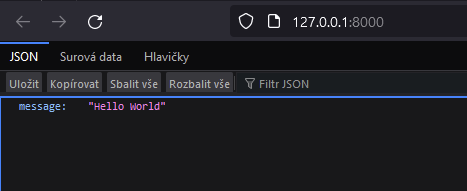

You can also use http://127.0.0.1:8000/docs to investigate endpoints of your API through GUI.

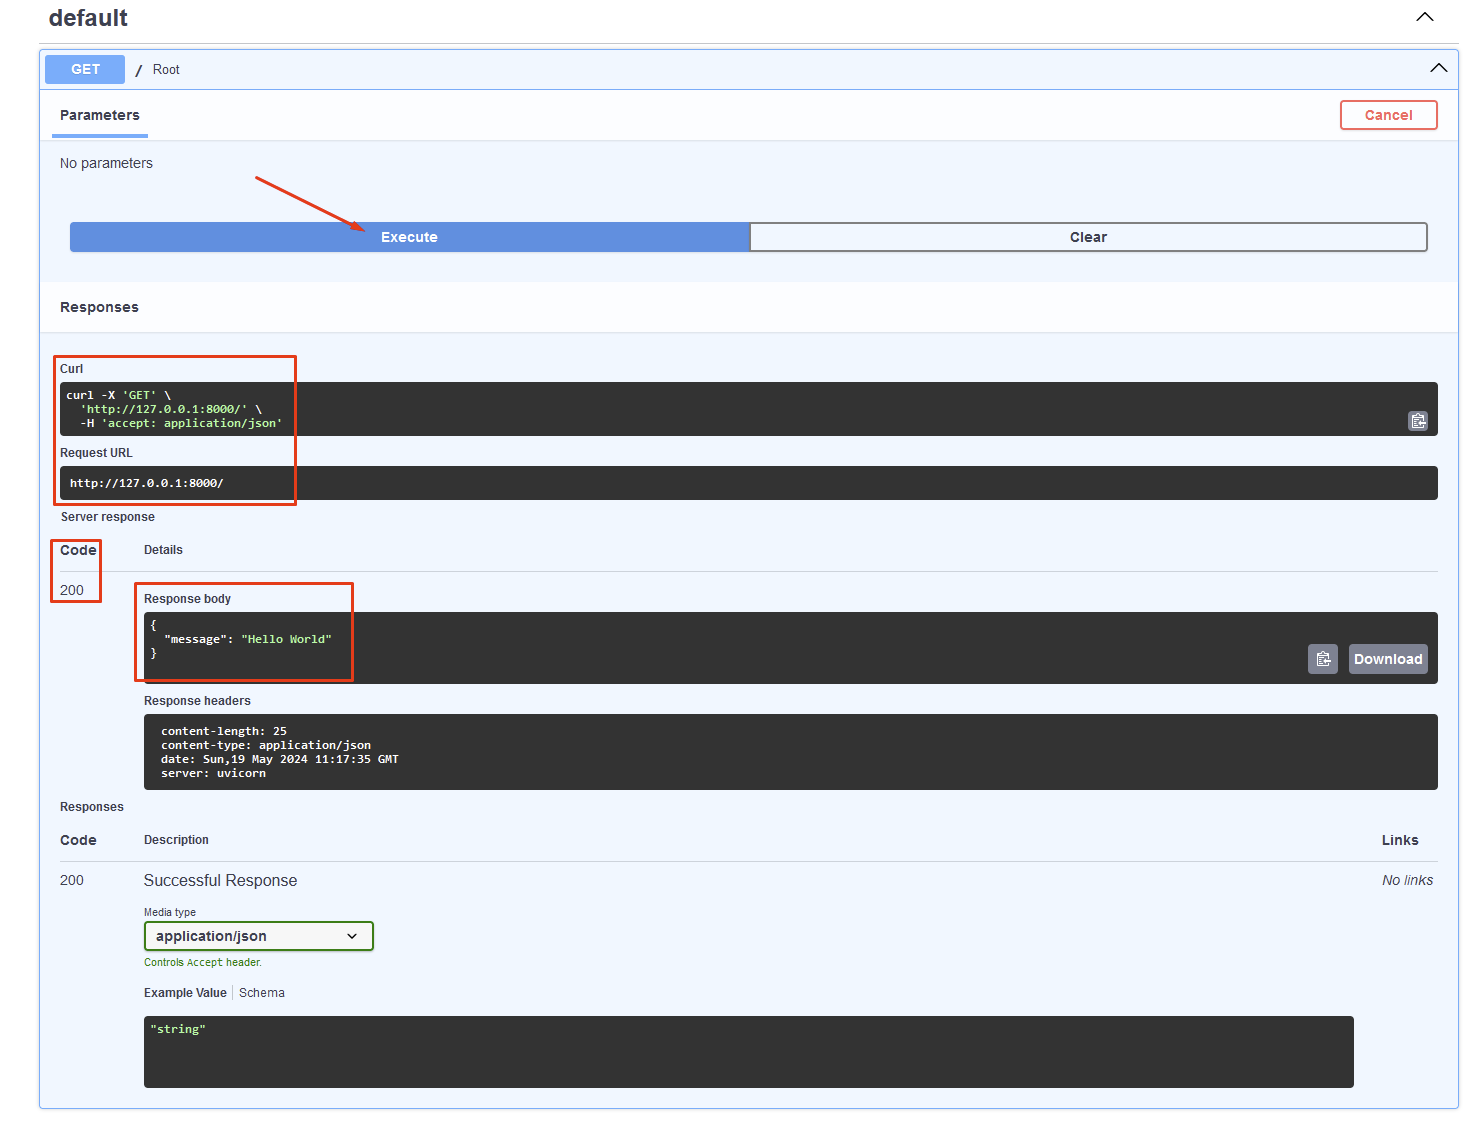

### Creating second endpoint

Let's extend the app with second endpoint.

In [2]:
from fastapi import FastAPI

app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Hello World"}


@app.get("/my_endpoint/")
async def my_new_endpoint():
    return {"message": "Hello World. I have created this endpoint myself"}

And see the output on http://127.0.0.1:8000/my_endpoint/

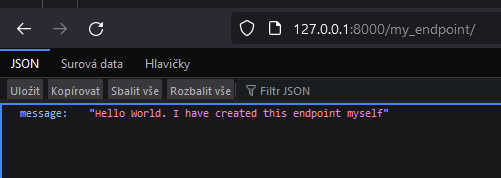

Or through the docs GUI

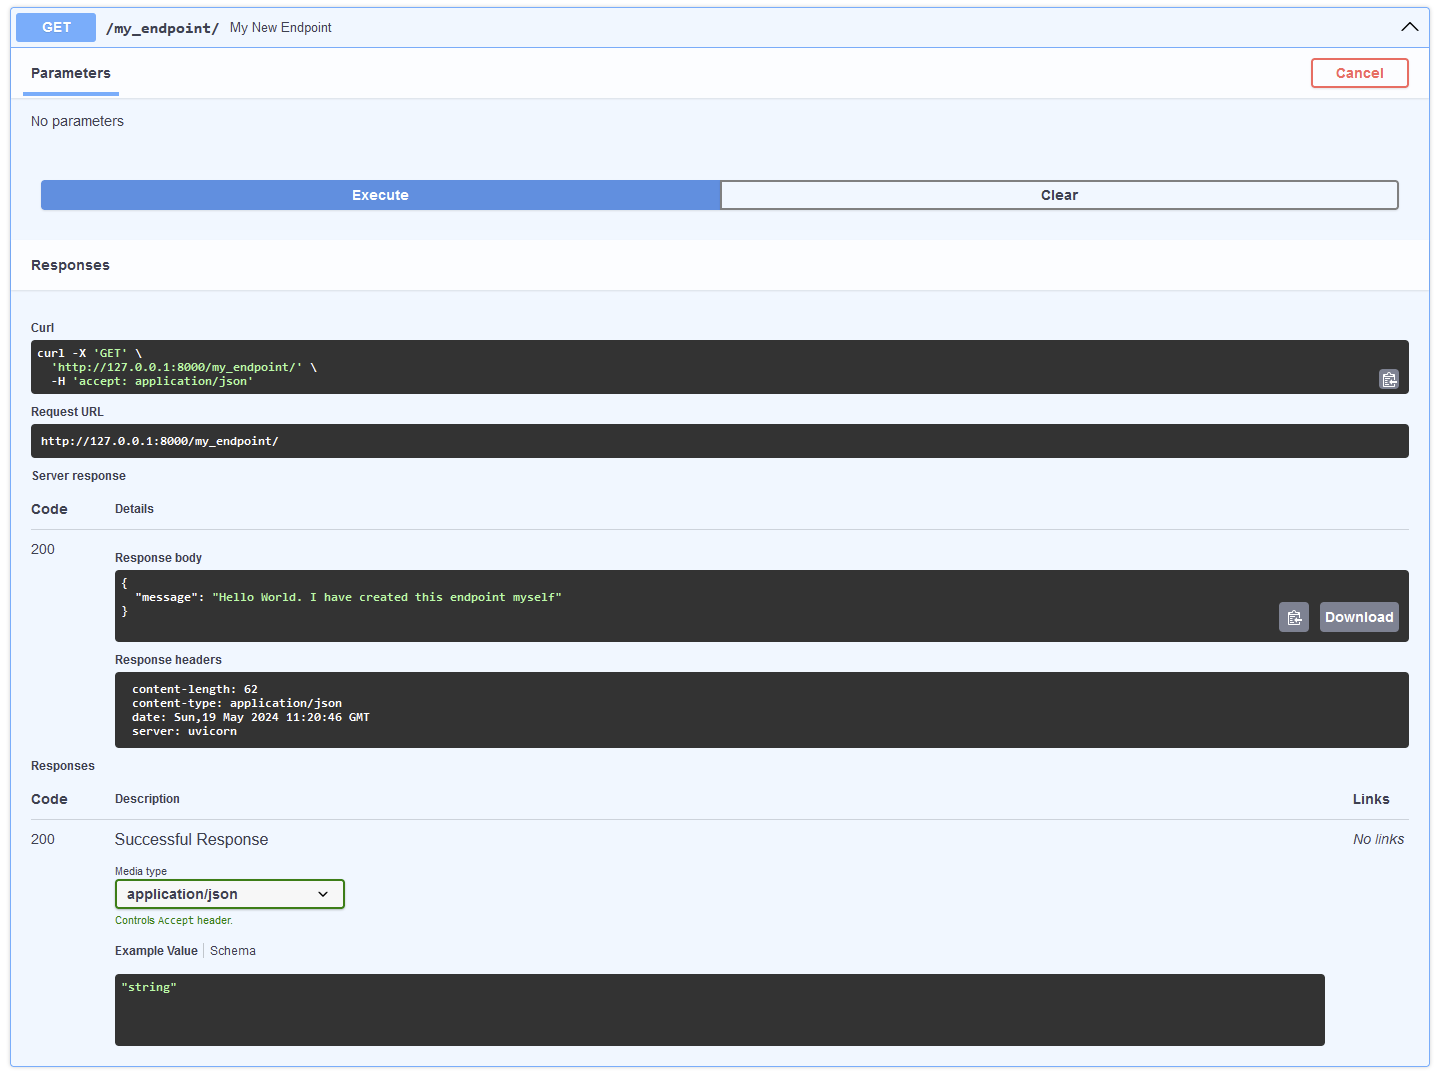

### Response types

In [3]:
from fastapi import FastAPI
from fastapi.responses import PlainTextResponse, HTMLResponse


app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Hello World"}


@app.get("/my_endpoint/")
async def my_new_endpoint():
    return {"message": "Hello World. I have created this endpoint myself"}


@app.get("/plaintext/", response_class=PlainTextResponse)
async def plain_text():
    return "Hello World\nI have created this endpoint myself"


@app.get("/html/", response_class=HTMLResponse)
async def html():
    return "<h1>Hello World</h1><p>I have created this endpoint myself</p>"

### Requesting our own API

In [4]:
import requests

response = requests.get('http://127.0.0.1:8000/my_endpoint/')
print(response.status_code)
print(response.text)
print(type(response.text))

200
{"message":"Hello World. I have created this endpoint myself"}
<class 'str'>


### Path parameters

In [5]:
from fastapi import FastAPI

app = FastAPI()


@app.get("/items/{item_id}")
async def read_item(item_id):
    return {"item_id": item_id}

In [6]:
import requests

response = requests.get('http://127.0.0.1:8000/items/42')
print(response.status_code)
print(response.text)
print(type(response.text))

200
{"item_id":"42"}
<class 'str'>


### Query parameters

In [7]:
from fastapi import FastAPI

app = FastAPI()


@app.get("/greetings")
async def read_item(name: str = "Alice"):
    return f"The name is {name}"

In [8]:
import requests

response = requests.get('http://127.0.0.1:8000/greetings?name=Martin')
print(response.status_code)
print(response.text)
print(type(response.text))

200
"The name is Martin"
<class 'str'>


### POST endpoint

In [9]:
from fastapi import FastAPI
from pydantic import BaseModel

app = FastAPI()


class Item(BaseModel):
    name: str
    description: str | None = None
    price: float
    tax: float | None = None


@app.post("/items/")
async def create_item(item: Item):
    return item

In [10]:
import requests
import json

data = {
    "name": "Item1",
    "description": "Nice item",
    "price": 42,
    "tax": 15,
}

response = requests.post('http://127.0.0.1:8000/items/', data=json.dumps(data))
print(response.status_code)
print(response.text)
print(type(response.text))

200
"Item created: name='Item1' description='Nice item' price=42.0 tax=15.0"
<class 'str'>


Or via docs

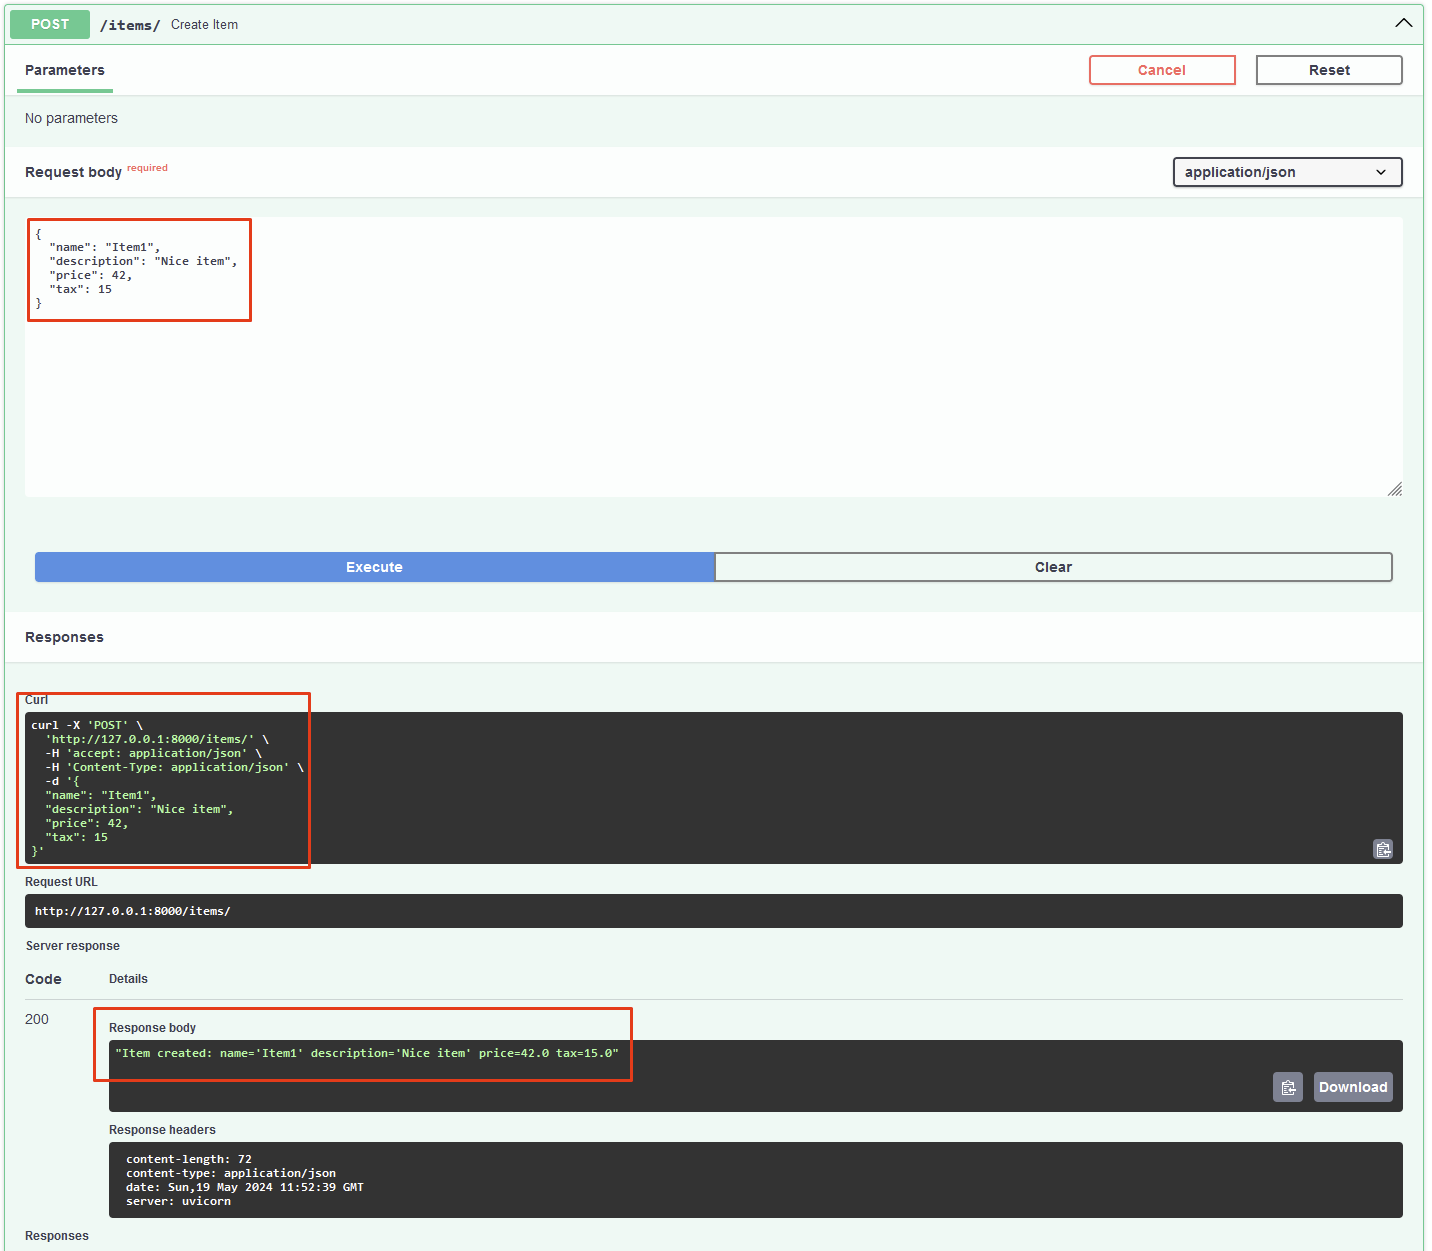